In [1]:
# import pandas libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [2]:
# import data frames
gas_df = pd.read_csv("avg_gas_price_ca.csv") 
wti_df = pd.read_csv("avg_wti_price.csv") 
geo_df = pd.read_csv("canadacities.csv")
geocode_df = pd.read_csv("3166-2-code.csv")

In [3]:
gas_df

,Unnamed: 0,City,Province,Price,Date
0,1,St. John's,Newfoundland and Labrador,120.3,Jan-2018
1,2,Charlottetown and Summerside,Prince Edward Island,115.3,Jan-2018
2,3,Halifax,Nova Scotia,115.2,Jan-2018
3,4,Saint John,New Brunswick,114.1,Jan-2018
4,5,Québec,Quebec,118.8,Jan-2018
...,...,...,...,...,...
1075,1135,Calgary,Alberta,124.2,Dec-2022
1076,1136,Vancouver,British Columbia,164.1,Dec-2022
1077,1137,Victoria,British Columbia,160.4,Dec-2022
1078,1138,Whitehorse,Yukon,174.5,Dec-2022


In [4]:
wti_df

,Unnamed: 0,Date,Price,Open,High,Low,Vol.,Change %,Month_Year,Avg_Price
0,0,2022-12-30,80.47,78.59,80.57,77.72,NaN,2.37%,Dec-2022,76.910833
1,1,2022-12-29,78.61,78.61,78.83,76.81,NaN,0.01%,Dec-2022,76.910833
2,2,2022-12-28,78.60,79.75,79.88,77.33,NaN,-1.47%,Dec-2022,76.910833
3,3,2022-12-27,79.77,80.97,81.17,79.17,NaN,-1.48%,Dec-2022,76.910833
4,4,2022-12-26,80.97,79.92,81.06,79.92,NaN,2.05%,Dec-2022,76.910833
...,...,...,...,...,...,...,...,...,...,...
1317,1317,2018-01-05,61.44,61.90,62.04,61.09,563.04K,-0.92%,Jan-2018,63.587083
1318,1318,2018-01-04,62.01,61.96,62.21,61.59,654.36K,0.62%,Jan-2018,63.587083
1319,1319,2018-01-03,61.63,60.39,61.97,60.28,673.86K,2.09%,Jan-2018,63.587083
1320,1320,2018-01-02,60.37,60.20,60.74,60.10,510.31K,0.22%,Jan-2018,63.587083


In [5]:
avg_mon = wti_df.groupby('Month_Year')['Avg_Price'].mean()

In [6]:
new_df = pd.DataFrame({'Month_Year': avg_mon.index, 'Avg_Price': avg_mon.values})

In [7]:
new_df.head(10)

,Month_Year,Avg_Price
0,Apr-2018,66.325238
1,Apr-2019,63.870952
2,Apr-2020,16.699048
3,Apr-2021,61.703810
4,Apr-2022,101.640500
5,Aug-2018,67.845217
6,Aug-2019,54.844091
7,Aug-2020,42.388095
8,Aug-2021,67.711364
9,Aug-2022,91.482609


In [8]:
new_df['Year'] = pd.to_datetime(new_df['Month_Year'], format='%b-%Y').dt.year

In [9]:
new_df['Month'] = pd.to_datetime(new_df['Month_Year'], format='%b-%Y').dt.month

In [10]:
df_sorted = new_df.sort_values(by=['Year', 'Month'], ascending=[True, True])
df_sorted = df_sorted.rename(columns={'Month_Year': 'Date'})

In [11]:
df_sorted.head(10)

,Date,Avg_Price,Year,Month
20,Jan-2018,63.587083,2018,1
15,Feb-2018,62.170952,2018,2
35,Mar-2018,62.771905,2018,3
0,Apr-2018,66.325238,2018,4
40,May-2018,69.751667,2018,5
30,Jun-2018,67.322857,2018,6
25,Jul-2018,70.743182,2018,7
5,Aug-2018,67.845217,2018,8
55,Sep-2018,70.078571,2018,9
50,Oct-2018,70.757826,2018,10


In [12]:
merged_df = pd.merge(gas_df, df_sorted[['Date', 'Avg_Price']], on='Date')

In [13]:
merged_df.head(10)

,Unnamed: 0,City,Province,Price,Date,Avg_Price
0,1,St. John's,Newfoundland and Labrador,120.3,Jan-2018,63.587083
1,2,Charlottetown and Summerside,Prince Edward Island,115.3,Jan-2018,63.587083
2,3,Halifax,Nova Scotia,115.2,Jan-2018,63.587083
3,4,Saint John,New Brunswick,114.1,Jan-2018,63.587083
4,5,Québec,Quebec,118.8,Jan-2018,63.587083
5,6,Montréal,Quebec,127.6,Jan-2018,63.587083
6,7,Ottawa,Ontario,124.4,Jan-2018,63.587083
7,8,Toronto,Ontario,124.5,Jan-2018,63.587083
8,9,Thunder Bay,Ontario,123.9,Jan-2018,63.587083
9,10,Winnipeg,Manitoba,107.0,Jan-2018,63.587083


In [14]:
geo_df.head(10)

,city,city_ascii,province_id,province_name,lat,lng,population,density,timezone,ranking,postal,id
0,Toronto,Toronto,ON,Ontario,43.7417,-79.3733,5429524,4334.4,America/Toronto,1,M5T M5V M5P M5S M5R M5E M5G M5A M5C M5B M5M M5...,1124279679
1,Montréal,Montreal,QC,Quebec,45.5089,-73.5617,3519595,3889.0,America/Montreal,1,H1X H1Y H1Z H1P H1R H1S H1T H1V H1W H1H H1J H1...,1124586170
2,Vancouver,Vancouver,BC,British Columbia,49.2500,-123.1000,2264823,5492.6,America/Vancouver,1,V6Z V6S V6R V6P V6N V6M V6L V6K V6J V6H V6G V6...,1124825478
3,Calgary,Calgary,AB,Alberta,51.0500,-114.0667,1239220,1501.1,America/Edmonton,1,T1Y T2H T2K T2J T2L T2N T2A T2C T2B T2E T2G T2...,1124690423
4,Edmonton,Edmonton,AB,Alberta,53.5344,-113.4903,1062643,1360.9,America/Edmonton,1,T5X T5Y T5Z T5P T5R T5S T5T T5V T5W T5H T5J T5...,1124290735
5,Ottawa,Ottawa,ON,Ontario,45.4247,-75.6950,989567,334.0,America/Montreal,1,K4P K4M K4A K4B K4C K7S K1S K1R K1P K1W K1V K1...,1124399363
6,Mississauga,Mississauga,ON,Ontario,43.6000,-79.6500,721599,2467.6,America/Toronto,2,L4W L4V L4T L4Z L4Y L4X L5R L5V L5W L5A L5B L5...,1124112672
7,Winnipeg,Winnipeg,MB,Manitoba,49.8844,-97.1464,705244,1430.0,America/Winnipeg,1,R2N R2M R2L R2K R2J R2H R2G R2C R2Y R2X R2W R2...,1124224963
8,Quebec City,Quebec City,QC,Quebec,46.8139,-71.2081,705103,1173.2,America/Montreal,1,G1N G1M G1L G1K G1J G1H G1G G1E G1C G1B G1Y G1...,1124823933
9,Hamilton,Hamilton,ON,Ontario,43.2567,-79.8692,693645,480.6,America/Toronto,2,L0R L0P L8W L8V L8T L8S L8R L8P L8G L8E L8N L8...,1124567288


In [15]:
final_df = pd.merge(merged_df, geo_df[['city', 'lat', 'lng']], left_on='City', right_on='city')

In [16]:
pd.set_option('display.max_rows', None)

In [17]:
final_df

,Unnamed: 0,City,Province,Price,Date,Avg_Price,city,lat,lng
0,1,St. John's,Newfoundland and Labrador,120.3,Jan-2018,63.587083,St. John's,47.4817,-52.7971
1,20,St. John's,Newfoundland and Labrador,121.8,Feb-2018,62.170952,St. John's,47.4817,-52.7971
2,39,St. John's,Newfoundland and Labrador,122.1,Mar-2018,62.771905,St. John's,47.4817,-52.7971
3,58,St. John's,Newfoundland and Labrador,131.0,Apr-2018,66.325238,St. John's,47.4817,-52.7971
4,77,St. John's,Newfoundland and Labrador,137.1,May-2018,69.751667,St. John's,47.4817,-52.7971
5,96,St. John's,Newfoundland and Labrador,134.3,Jun-2018,67.322857,St. John's,47.4817,-52.7971
6,115,St. John's,Newfoundland and Labrador,134.9,Jul-2018,70.743182,St. John's,47.4817,-52.7971
7,134,St. John's,Newfoundland and Labrador,132.5,Aug-2018,67.845217,St. John's,47.4817,-52.7971
8,153,St. John's,Newfoundland and Labrador,131.2,Sep-2018,70.078571,St. John's,47.4817,-52.7971
9,172,St. John's,Newfoundland and Labrador,131.2,Oct-2018,70.757826,St. John's,47.4817,-52.7971


In [18]:
geocode_df.head(10)

,Subdivision category,3166-2 code,Subdivision name,Language code
0,province,CA-AB,Alberta,en
1,province,CA-AB,Alberta,fr
2,province,CA-BC,British Columbia,en
3,province,CA-BC,Colombie-Britannique,fr
4,province,CA-MB,Manitoba,en
5,province,CA-MB,Manitoba,fr
6,province,CA-NB,New Brunswick,en
7,province,CA-NL,Newfoundland and Labrador,en
8,territory,CA-NT,Northwest Territories,en
9,province,CA-NB,Nouveau-Brunswick,fr


In [19]:
geocode_df = geocode_df.rename(columns={'Subdivision name': 'Province'})

In [20]:
geocode_df.head(10)

,Subdivision category,3166-2 code,Province,Language code
0,province,CA-AB,Alberta,en
1,province,CA-AB,Alberta,fr
2,province,CA-BC,British Columbia,en
3,province,CA-BC,Colombie-Britannique,fr
4,province,CA-MB,Manitoba,en
5,province,CA-MB,Manitoba,fr
6,province,CA-NB,New Brunswick,en
7,province,CA-NL,Newfoundland and Labrador,en
8,territory,CA-NT,Northwest Territories,en
9,province,CA-NB,Nouveau-Brunswick,fr


In [21]:
geocode_df = geocode_df.drop(geocode_df[geocode_df['Language code'] == 'fr'].index)

In [22]:
geocode_df

,Subdivision category,3166-2 code,Province,Language code
0,province,CA-AB,Alberta,en
2,province,CA-BC,British Columbia,en
4,province,CA-MB,Manitoba,en
6,province,CA-NB,New Brunswick,en
7,province,CA-NL,Newfoundland and Labrador,en
8,territory,CA-NT,Northwest Territories,en
11,province,CA-NS,Nova Scotia,en
12,territory,CA-NU,Nunavut,en
14,province,CA-ON,Ontario,en
16,province,CA-PE,Prince Edward Island,en


In [23]:
merged_df2 = pd.merge(final_df, geocode_df[['3166-2 code', 'Province']], on='Province')

In [24]:
merged_df2

,Unnamed: 0,City,Province,Price,Date,Avg_Price,city,lat,lng,3166-2 code
0,1,St. John's,Newfoundland and Labrador,120.3,Jan-2018,63.587083,St. John's,47.4817,-52.7971,CA-NL
1,20,St. John's,Newfoundland and Labrador,121.8,Feb-2018,62.170952,St. John's,47.4817,-52.7971,CA-NL
2,39,St. John's,Newfoundland and Labrador,122.1,Mar-2018,62.771905,St. John's,47.4817,-52.7971,CA-NL
3,58,St. John's,Newfoundland and Labrador,131.0,Apr-2018,66.325238,St. John's,47.4817,-52.7971,CA-NL
4,77,St. John's,Newfoundland and Labrador,137.1,May-2018,69.751667,St. John's,47.4817,-52.7971,CA-NL
5,96,St. John's,Newfoundland and Labrador,134.3,Jun-2018,67.322857,St. John's,47.4817,-52.7971,CA-NL
6,115,St. John's,Newfoundland and Labrador,134.9,Jul-2018,70.743182,St. John's,47.4817,-52.7971,CA-NL
7,134,St. John's,Newfoundland and Labrador,132.5,Aug-2018,67.845217,St. John's,47.4817,-52.7971,CA-NL
8,153,St. John's,Newfoundland and Labrador,131.2,Sep-2018,70.078571,St. John's,47.4817,-52.7971,CA-NL
9,172,St. John's,Newfoundland and Labrador,131.2,Oct-2018,70.757826,St. John's,47.4817,-52.7971,CA-NL


In [25]:
com_df = merged_df2[['Province', 'City', 'lat', 'lng', '3166-2 code', 'Price', 'Avg_Price', 'Date']]

In [26]:
com_df

,Province,City,lat,lng,3166-2 code,Price,Avg_Price,Date
0,Newfoundland and Labrador,St. John's,47.4817,-52.7971,CA-NL,120.3,63.587083,Jan-2018
1,Newfoundland and Labrador,St. John's,47.4817,-52.7971,CA-NL,121.8,62.170952,Feb-2018
2,Newfoundland and Labrador,St. John's,47.4817,-52.7971,CA-NL,122.1,62.771905,Mar-2018
3,Newfoundland and Labrador,St. John's,47.4817,-52.7971,CA-NL,131.0,66.325238,Apr-2018
4,Newfoundland and Labrador,St. John's,47.4817,-52.7971,CA-NL,137.1,69.751667,May-2018
5,Newfoundland and Labrador,St. John's,47.4817,-52.7971,CA-NL,134.3,67.322857,Jun-2018
6,Newfoundland and Labrador,St. John's,47.4817,-52.7971,CA-NL,134.9,70.743182,Jul-2018
7,Newfoundland and Labrador,St. John's,47.4817,-52.7971,CA-NL,132.5,67.845217,Aug-2018
8,Newfoundland and Labrador,St. John's,47.4817,-52.7971,CA-NL,131.2,70.078571,Sep-2018
9,Newfoundland and Labrador,St. John's,47.4817,-52.7971,CA-NL,131.2,70.757826,Oct-2018


In [27]:
com_df = com_df.rename(columns={'Province':'province','City':'city', '3166-2 code': '3166-2_code','Price':'avg_gas_price','Avg_Price':'avg_wti_price'})

In [28]:
com_df

,province,city,lat,lng,3166-2_code,avg_gas_price,avg_wti_price,Date
0,Newfoundland and Labrador,St. John's,47.4817,-52.7971,CA-NL,120.3,63.587083,Jan-2018
1,Newfoundland and Labrador,St. John's,47.4817,-52.7971,CA-NL,121.8,62.170952,Feb-2018
2,Newfoundland and Labrador,St. John's,47.4817,-52.7971,CA-NL,122.1,62.771905,Mar-2018
3,Newfoundland and Labrador,St. John's,47.4817,-52.7971,CA-NL,131.0,66.325238,Apr-2018
4,Newfoundland and Labrador,St. John's,47.4817,-52.7971,CA-NL,137.1,69.751667,May-2018
5,Newfoundland and Labrador,St. John's,47.4817,-52.7971,CA-NL,134.3,67.322857,Jun-2018
6,Newfoundland and Labrador,St. John's,47.4817,-52.7971,CA-NL,134.9,70.743182,Jul-2018
7,Newfoundland and Labrador,St. John's,47.4817,-52.7971,CA-NL,132.5,67.845217,Aug-2018
8,Newfoundland and Labrador,St. John's,47.4817,-52.7971,CA-NL,131.2,70.078571,Sep-2018
9,Newfoundland and Labrador,St. John's,47.4817,-52.7971,CA-NL,131.2,70.757826,Oct-2018


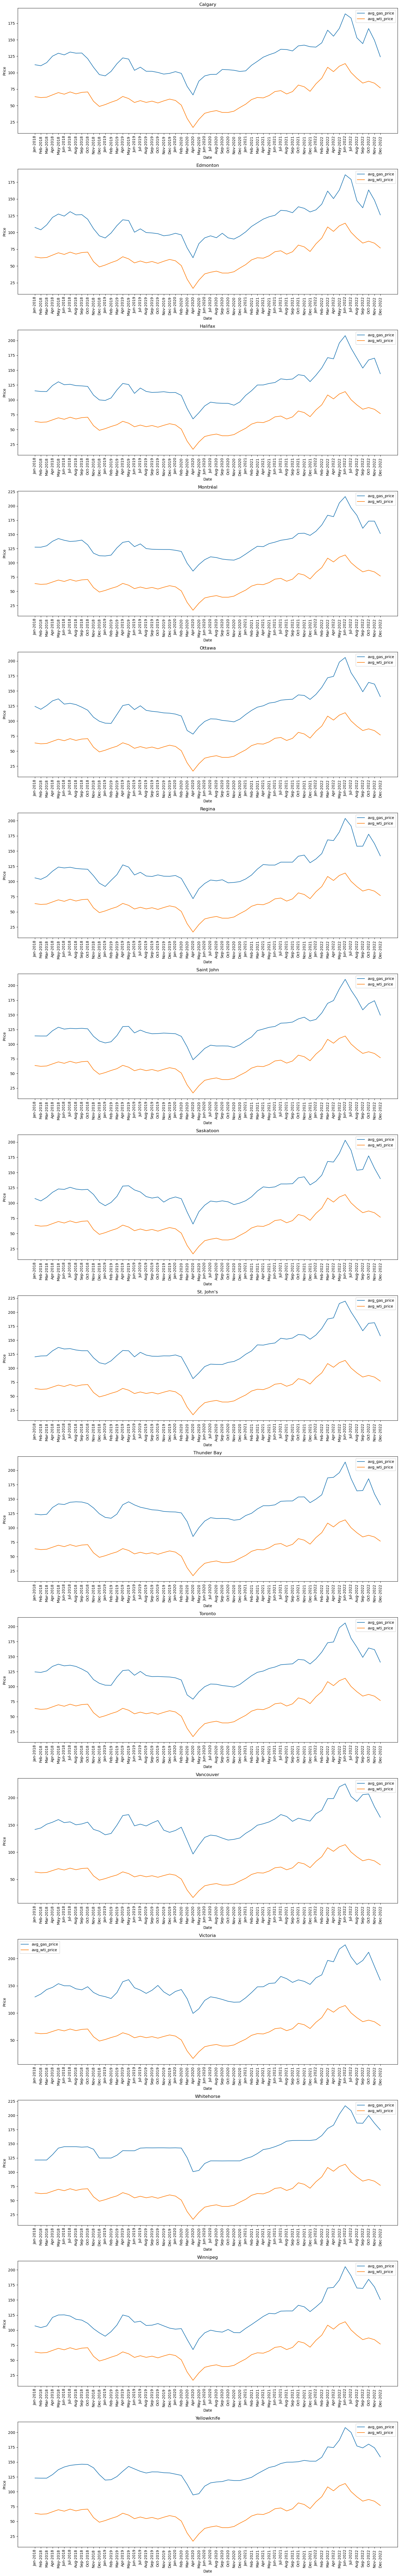

In [29]:
grouped = com_df.groupby('city')

# Create subplots for each city
fig, axs = plt.subplots(nrows=len(grouped), ncols=1, figsize=(15, 6 * len(grouped)))

# Iterate over each city and plot avg_gas_price and avg_wti_price against date
for i, (city, data) in enumerate(grouped):
    ax = axs[i]
    ax.plot(data['Date'], data['avg_gas_price'], label='avg_gas_price')
    ax.plot(data['Date'], data['avg_wti_price'], label='avg_wti_price')
    ax.set_title(city)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend()
    ax.tick_params(axis='x', rotation=90)

# Adjust the layout and spacing of the subplots
plt.tight_layout()


# Show the plot
plt.show()

In [30]:
com_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1080 entries, 0 to 1079
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   province       1080 non-null   object 
 1   city           1080 non-null   object 
 2   lat            1080 non-null   float64
 3   lng            1080 non-null   float64
 4   3166-2_code    1080 non-null   object 
 5   avg_gas_price  1080 non-null   float64
 6   avg_wti_price  1080 non-null   float64
 7   Date           1080 non-null   object 
dtypes: float64(4), object(4)
memory usage: 75.9+ KB


In [31]:
com_df.to_csv('gas_wti_ca-2018-2022.csv')